In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
import re
import matplotlib as plt
import seaborn as sns
from lxml import html
import numpy as np

In [2]:
who_df= pd.read_csv('..\data\Who_workbook.csv',  encoding='latin1')
who_df

,Country,Price 2014,Affordability Change 2014,Tax Share 2014,Tax Structure 2014,Overall Score 2014,Price 2016,Affordability Change 2016,Tax Share 2016,Tax Structure 2016,...,Price 2018,Affordability Change 2018,Tax Share 2018,Tax Structure 2018,Overall Score 2018,Price 2020,Affordability Change 2020,Tax Share 2020,Tax Structure 2020,Overall Score 2020
0,Afghanistan,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0.25,0,0,0,0,0
1,Albania,2,3,2.5,4,2.88,2,3,3,4,...,2,0,3,4,2.25,3,0,3.5,5,2.88
2,Algeria,1,0,0.5,1,0.63,2,5,0.5,1,...,3,5,0,1,2.25,3,5,0.5,1,2.38
3,Andorra,.,5,4,1,.,.,0,4.5,1,...,.,0,5,4,.,.,0*,5,4,.
4,Angola,1,1,0,0,0.5,.,0,.,.,...,1,1,0,0,0.5,2,5,0,2,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela (Bolivarian Republic of),.,1,4,.,.,.,1,4,2,...,.,1,4,2,.,.,1,4,.,.
191,Viet Nam,1,0*,0,2,0.75,1,0,0.5,2,...,1,0,0.5,2,0.88,1,0*,1,2,1
192,Yemen,.,4,1,4,.,.,5,1,1,...,.,5,1,4,.,.,5,1,4,.
193,Zambia,1,0*,0,2,0.75,2,0,0.5,2,...,1,0,0.5,2,0.88,1,0,0.5,4,1.38


In [3]:
df_2= pd.read_csv('..\data\enforcement-of-bans-on-tobacco-advertising.csv')
df_2

,Entity,Code,Year,Indicator:Enforce bans on tobacco advertising
0,Afghanistan,AFG,2007,4
1,Afghanistan,AFG,2008,4
2,Afghanistan,AFG,2010,4
3,Afghanistan,AFG,2012,4
4,Afghanistan,AFG,2014,4
...,...,...,...,...
1360,Zimbabwe,ZWE,2010,2
1361,Zimbabwe,ZWE,2012,2
1362,Zimbabwe,ZWE,2014,2
1363,Zimbabwe,ZWE,2016,2


In [4]:
df_3= pd.read_csv('..\data\share-of-tobacco-retail-price-that-is-tax.csv')
df_3

,Entity,Code,Year,Indicator:Raise taxes on tobacco
0,Afghanistan,AFG,2008,2
1,Afghanistan,AFG,2010,2
2,Afghanistan,AFG,2012,2
3,Afghanistan,AFG,2014,2
4,Afghanistan,AFG,2016,2
...,...,...,...,...
1153,Zimbabwe,ZWE,2010,4
1154,Zimbabwe,ZWE,2012,3
1155,Zimbabwe,ZWE,2014,3
1156,Zimbabwe,ZWE,2016,3


In [5]:
df_4= pd.read_csv('..\data\smoking-death-rate-1990-2017.csv')
df_4

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate),Continent,Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate).1,Year.1
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1990,75.84,NaN,81.75,2019.0
2,Afghanistan,AFG,1991,75.64,NaN,81.75,2019.0
3,Afghanistan,AFG,1992,75.66,NaN,81.75,2019.0
4,Afghanistan,AFG,1993,76.53,NaN,81.75,2019.0
...,...,...,...,...,...,...,...
6916,Zimbabwe,ZWE,2016,140.49,NaN,134.16,2019.0
6917,Zimbabwe,ZWE,2017,138.10,NaN,134.16,2019.0
6918,Zimbabwe,ZWE,2018,135.94,NaN,134.16,2019.0
6919,Zimbabwe,ZWE,2019,134.16,NaN,134.16,2019.0


In [6]:
countries_df= pd.merge(df_2,df_3,how='left',on=['Entity', 'Year'])

countries_df

,Entity,Code_x,Year,Indicator:Enforce bans on tobacco advertising,Code_y,Indicator:Raise taxes on tobacco
0,Afghanistan,AFG,2007,4,NaN,NaN
1,Afghanistan,AFG,2008,4,AFG,2.0
2,Afghanistan,AFG,2010,4,AFG,2.0
3,Afghanistan,AFG,2012,4,AFG,2.0
4,Afghanistan,AFG,2014,4,AFG,2.0
...,...,...,...,...,...,...
1360,Zimbabwe,ZWE,2010,2,ZWE,4.0
1361,Zimbabwe,ZWE,2012,2,ZWE,3.0
1362,Zimbabwe,ZWE,2014,2,ZWE,3.0
1363,Zimbabwe,ZWE,2016,2,ZWE,3.0


In [7]:
countries_df_1= pd.merge(countries_df,df_4,how='left',on=['Entity', 'Year'])

countries_df_1

,Entity,Code_x,Year,Indicator:Enforce bans on tobacco advertising,Code_y,Indicator:Raise taxes on tobacco,Code,Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate),Continent,Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate).1,Year.1
0,Afghanistan,AFG,2007,4,NaN,NaN,AFG,79.44,NaN,81.75,2019.0
1,Afghanistan,AFG,2008,4,AFG,2.0,AFG,79.74,NaN,81.75,2019.0
2,Afghanistan,AFG,2010,4,AFG,2.0,AFG,79.72,NaN,81.75,2019.0
3,Afghanistan,AFG,2012,4,AFG,2.0,AFG,80.20,NaN,81.75,2019.0
4,Afghanistan,AFG,2014,4,AFG,2.0,AFG,80.72,NaN,81.75,2019.0
...,...,...,...,...,...,...,...,...,...,...,...
1360,Zimbabwe,ZWE,2010,2,ZWE,4.0,ZWE,158.00,NaN,134.16,2019.0
1361,Zimbabwe,ZWE,2012,2,ZWE,3.0,ZWE,150.48,NaN,134.16,2019.0
1362,Zimbabwe,ZWE,2014,2,ZWE,3.0,ZWE,144.08,NaN,134.16,2019.0
1363,Zimbabwe,ZWE,2016,2,ZWE,3.0,ZWE,140.49,NaN,134.16,2019.0


In [8]:
tax_df= countries_df_1[['Entity','Indicator:Raise taxes on tobacco','Indicator:Enforce bans on tobacco advertising']]
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1364
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Entity                                         1365 non-null   object 
 1   Indicator:Raise taxes on tobacco               1158 non-null   float64
 2   Indicator:Enforce bans on tobacco advertising  1365 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 42.7+ KB


In [9]:
tax_df

,Entity,Indicator:Raise taxes on tobacco,Indicator:Enforce bans on tobacco advertising
0,Afghanistan,NaN,4
1,Afghanistan,2.0,4
2,Afghanistan,2.0,4
3,Afghanistan,2.0,4
4,Afghanistan,2.0,4
...,...,...,...
1360,Zimbabwe,4.0,2
1361,Zimbabwe,3.0,2
1362,Zimbabwe,3.0,2
1363,Zimbabwe,3.0,2


In [10]:
tax_gb= tax_df.groupby(['Entity'],as_index = False)['Indicator:Raise taxes on tobacco','Indicator:Enforce bans on tobacco advertising'].mean()

tax_gb

C:\Users\Andrew\AppData\Local\Temp\ipykernel_15316\3070528545.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tax_gb= tax_df.groupby(['Entity'],as_index = False)['Indicator:Raise taxes on tobacco','Indicator:Enforce bans on tobacco advertising'].mean()


,Entity,Indicator:Raise taxes on tobacco,Indicator:Enforce bans on tobacco advertising
0,Afghanistan,2.000000,4.285714
1,Albania,4.000000,5.000000
2,Algeria,3.333333,4.000000
3,Andorra,3.666667,2.000000
4,Angola,1.666667,2.000000
...,...,...,...
190,Venezuela,4.000000,2.000000
191,Vietnam,3.000000,4.000000
192,Yemen,4.000000,4.428571
193,Zambia,3.000000,2.000000


In [11]:
tax_bans_top_ten= tax_gb.nlargest(n=10, columns=['Indicator:Enforce bans on tobacco advertising'],  keep='all')

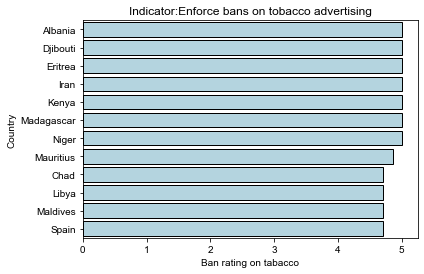

In [12]:
a = sns.barplot(y = 'Entity', x = 'Indicator:Enforce bans on tobacco advertising',
            data=tax_bans_top_ten,edgecolor="0",orient = 'h',order=tax_bans_top_ten.sort_values('Indicator:Enforce bans on tobacco advertising',ascending = False).Entity,color='lightblue').set(title = 'Indicator:Enforce bans on tobacco advertising',xlabel='Ban rating on tabacco',ylabel='Country')
sns.set_theme(style='white', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=False, rc=None)




In [13]:
who_df.rename(columns={"Country":"Entity"})

,Entity,Price 2014,Affordability Change 2014,Tax Share 2014,Tax Structure 2014,Overall Score 2014,Price 2016,Affordability Change 2016,Tax Share 2016,Tax Structure 2016,...,Price 2018,Affordability Change 2018,Tax Share 2018,Tax Structure 2018,Overall Score 2018,Price 2020,Affordability Change 2020,Tax Share 2020,Tax Structure 2020,Overall Score 2020
0,Afghanistan,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0.25,0,0,0,0,0
1,Albania,2,3,2.5,4,2.88,2,3,3,4,...,2,0,3,4,2.25,3,0,3.5,5,2.88
2,Algeria,1,0,0.5,1,0.63,2,5,0.5,1,...,3,5,0,1,2.25,3,5,0.5,1,2.38
3,Andorra,.,5,4,1,.,.,0,4.5,1,...,.,0,5,4,.,.,0*,5,4,.
4,Angola,1,1,0,0,0.5,.,0,.,.,...,1,1,0,0,0.5,2,5,0,2,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela (Bolivarian Republic of),.,1,4,.,.,.,1,4,2,...,.,1,4,2,.,.,1,4,.,.
191,Viet Nam,1,0*,0,2,0.75,1,0,0.5,2,...,1,0,0.5,2,0.88,1,0*,1,2,1
192,Yemen,.,4,1,4,.,.,5,1,1,...,.,5,1,4,.,.,5,1,4,.
193,Zambia,1,0*,0,2,0.75,2,0,0.5,2,...,1,0,0.5,2,0.88,1,0,0.5,4,1.38


In [14]:
who_df_1= who_df.replace('0*', np.NaN)

In [15]:
who_df_1= who_df_1.replace('.',np.NaN)
who_df_1

,Country,Price 2014,Affordability Change 2014,Tax Share 2014,Tax Structure 2014,Overall Score 2014,Price 2016,Affordability Change 2016,Tax Share 2016,Tax Structure 2016,...,Price 2018,Affordability Change 2018,Tax Share 2018,Tax Structure 2018,Overall Score 2018,Price 2020,Affordability Change 2020,Tax Share 2020,Tax Structure 2020,Overall Score 2020
0,Afghanistan,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0.25,0,0,0,0,0
1,Albania,2,3,2.5,4,2.88,2,3,3,4,...,2,0,3,4,2.25,3,0,3.5,5,2.88
2,Algeria,1,0,0.5,1,0.63,2,5,0.5,1,...,3,5,0,1,2.25,3,5,0.5,1,2.38
3,Andorra,NaN,5,4,1,NaN,NaN,0,4.5,1,...,NaN,0,5,4,NaN,NaN,NaN,5,4,NaN
4,Angola,1,1,0,0,0.5,NaN,0,NaN,NaN,...,1,1,0,0,0.5,2,5,0,2,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela (Bolivarian Republic of),NaN,1,4,NaN,NaN,NaN,1,4,2,...,NaN,1,4,2,NaN,NaN,1,4,NaN,NaN
191,Viet Nam,1,NaN,0,2,0.75,1,0,0.5,2,...,1,0,0.5,2,0.88,1,NaN,1,2,1
192,Yemen,NaN,4,1,4,NaN,NaN,5,1,1,...,NaN,5,1,4,NaN,NaN,5,1,4,NaN
193,Zambia,1,NaN,0,2,0.75,2,0,0.5,2,...,1,0,0.5,2,0.88,1,0,0.5,4,1.38


In [16]:
who_df_2= who_df_1.replace(np.nan, ' ')

who_df_2

,Country,Price 2014,Affordability Change 2014,Tax Share 2014,Tax Structure 2014,Overall Score 2014,Price 2016,Affordability Change 2016,Tax Share 2016,Tax Structure 2016,...,Price 2018,Affordability Change 2018,Tax Share 2018,Tax Structure 2018,Overall Score 2018,Price 2020,Affordability Change 2020,Tax Share 2020,Tax Structure 2020,Overall Score 2020
0,Afghanistan,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0.25,0,0,0,0,0
1,Albania,2,3,2.5,4,2.88,2,3,3,4,...,2,0,3,4,2.25,3,0,3.5,5,2.88
2,Algeria,1,0,0.5,1,0.63,2,5,0.5,1,...,3,5,0,1,2.25,3,5,0.5,1,2.38
3,Andorra,,5,4,1,,,0,4.5,1,...,,0,5,4,,,,5,4,
4,Angola,1,1,0,0,0.5,,0,,,...,1,1,0,0,0.5,2,5,0,2,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela (Bolivarian Republic of),,1,4,,,,1,4,2,...,,1,4,2,,,1,4,,
191,Viet Nam,1,,0,2,0.75,1,0,0.5,2,...,1,0,0.5,2,0.88,1,,1,2,1
192,Yemen,,4,1,4,,,5,1,1,...,,5,1,4,,,5,1,4,
193,Zambia,1,,0,2,0.75,2,0,0.5,2,...,1,0,0.5,2,0.88,1,0,0.5,4,1.38


In [17]:
who_df_2.to_csv('..\csv_nb\Book2.csv')